In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,3)})
pd.set_option('display.max_columns', 50)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
housing_train = pd.read_csv('Housing_dataset_train.csv')
housing_test =  pd.read_csv('Housing_dataset_test.csv')
housing_train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [3]:
housing_test.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1


In [4]:
print(f"The train dataset contains {housing_train.shape[0]} rows and {housing_train.shape[1]} columns")
print(f"The test dataset contains {housing_test.shape[0]} rows and {housing_test.shape[1]} columns")

The train dataset contains 14000 rows and 7 columns
The test dataset contains 6000 rows and 6 columns


In [5]:
print(housing_train.info())
print('------------' *5)
print(housing_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB
None
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             6000 non-null   int64 
 1   loc            6000 non-null   object
 2   title          6000 non-null   object
 3   bedroom        6000 non-null   int64 
 4

In [6]:
housing_train.describe(include='all')

,ID,loc,title,bedroom,bathroom,parking_space,price
count,14000.000000,12187,12278,12201.000000,12195.000000,12189.000000,1.400000e+04
unique,NaN,36,10,NaN,NaN,NaN,NaN
top,NaN,Kaduna,Flat,NaN,NaN,NaN,NaN
freq,NaN,370,1372,NaN,NaN,NaN,NaN
mean,4862.700357,NaN,NaN,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,NaN,NaN,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,NaN,NaN,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,NaN,NaN,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,NaN,NaN,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,NaN,NaN,6.000000,5.000000,4.000000,2.586699e+06


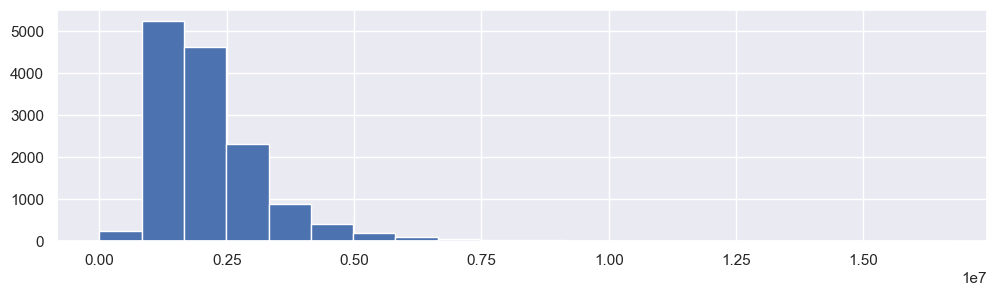

In [7]:
bins = np.arange(20, housing_train['price'].max()+830000, 830000)
plt.hist(data = housing_train, x = 'price', bins = bins);

In [8]:
# sns.boxplot(housing_train, x='price');

In [9]:
housing_train.nunique()

ID               10182
loc                 36
title               10
bedroom              9
bathroom             7
parking_space        6
price            10727
dtype: int64

In [10]:
# Checking for misiing values
round((housing_train.isnull().sum().sort_values(ascending=False)/len(housing_train))*100,2)

loc              12.95
parking_space    12.94
bathroom         12.89
bedroom          12.85
title            12.30
ID                0.00
price             0.00
dtype: float64

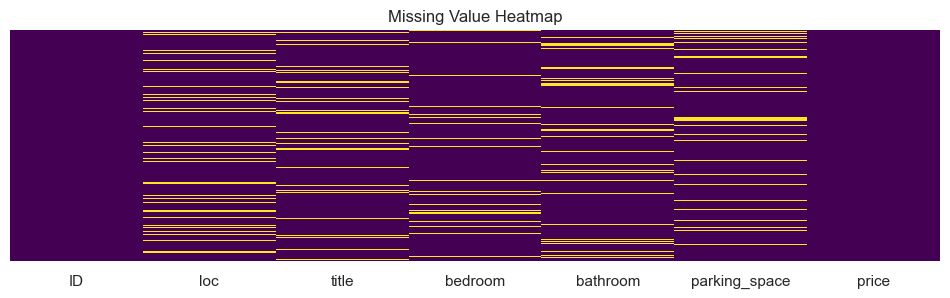

In [11]:
sns.heatmap(housing_train.isnull(),cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Value Heatmap");

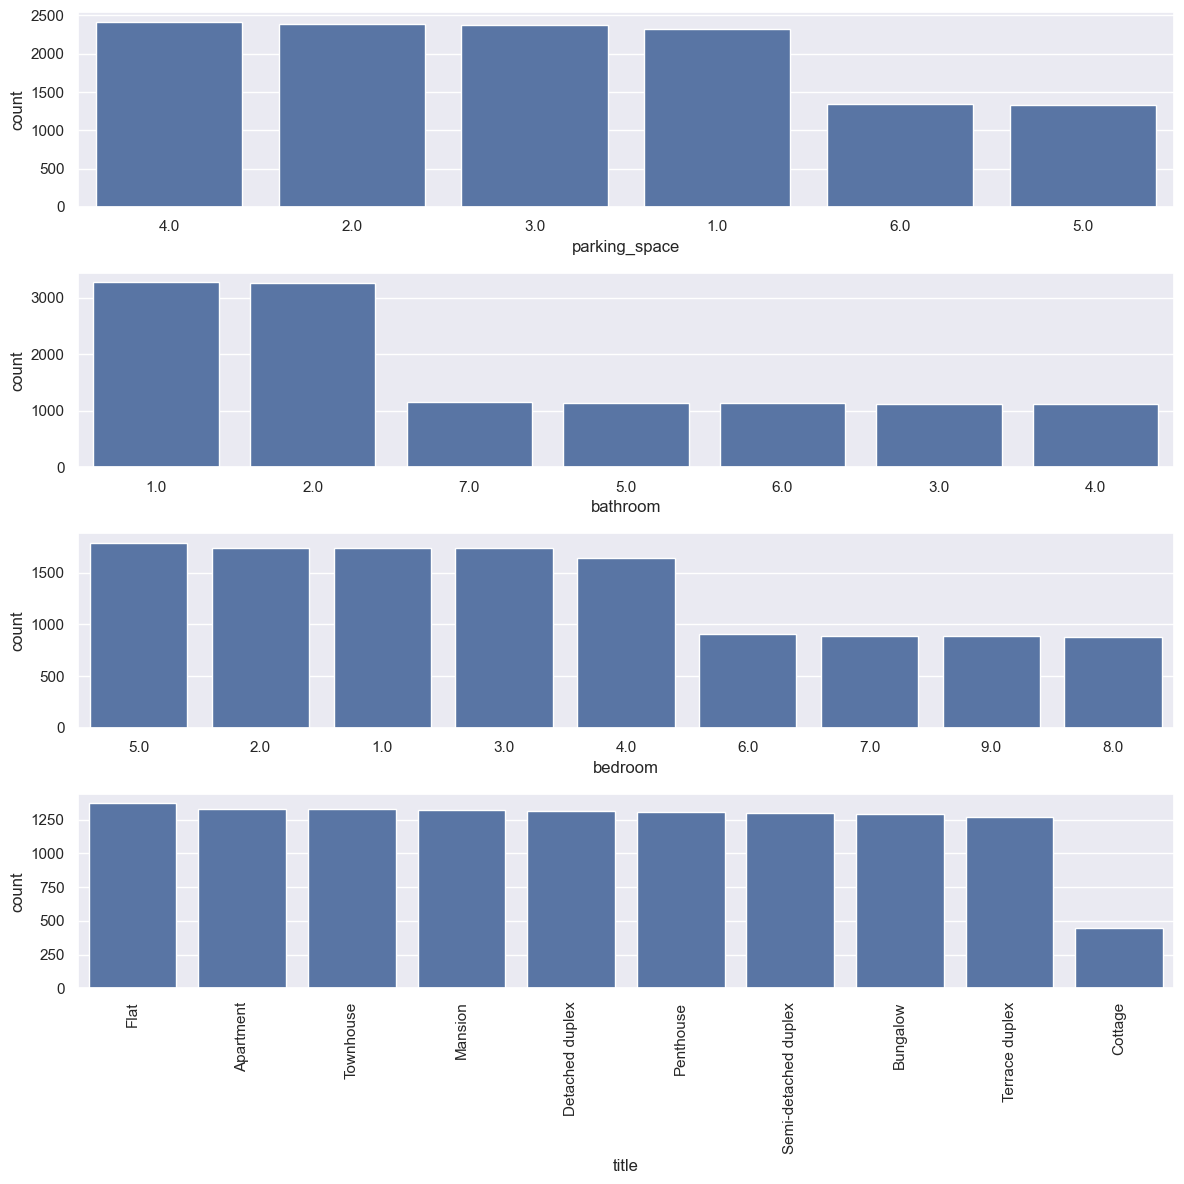

In [12]:
# Visualizing categorical variable and viewing it distribution
fig, ax = plt.subplots(nrows=4, figsize = [12,12])

sns.countplot(housing_train, x='parking_space', order = housing_train['parking_space'].value_counts().index, color=sns.color_palette()[0],ax=ax[0])
sns.countplot(housing_train, x='bathroom', order = housing_train['bathroom'].value_counts().index, color=sns.color_palette()[0], ax=ax[1])
sns.countplot(housing_train, x='bedroom', order = housing_train['bedroom'].value_counts().index, color=sns.color_palette()[0], ax=ax[2])
sns.countplot(housing_train, x='title', order = housing_train['title'].value_counts().index, color=sns.color_palette()[0], ax=ax[3])
plt.xticks(rotation=90)
plt.tight_layout();

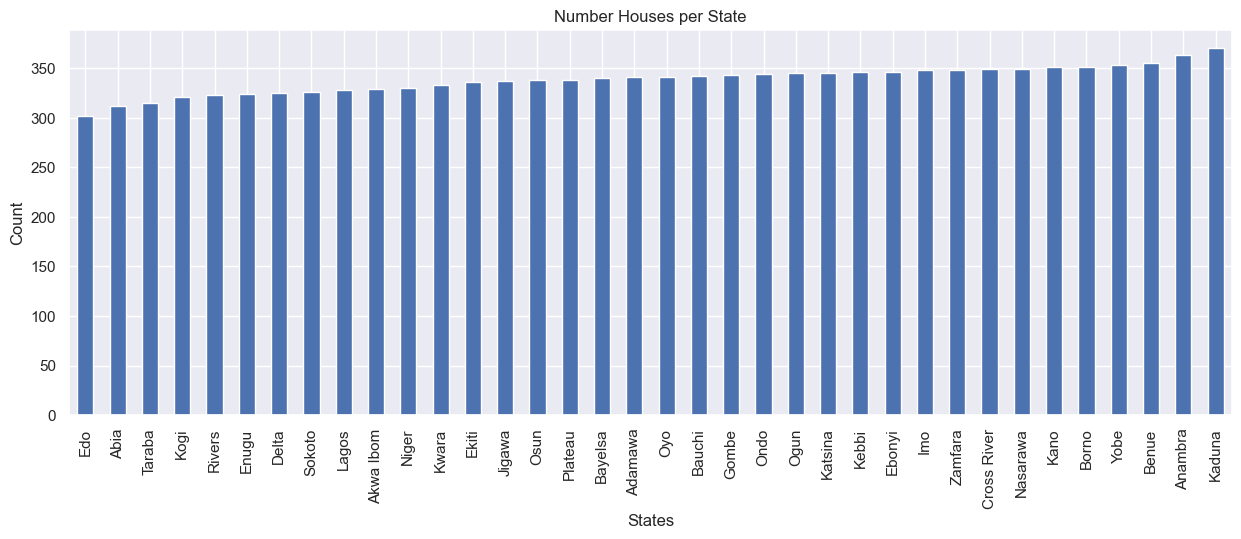

In [13]:
fig, ax = plt.subplots(figsize = [15,5])
housing_train['loc'].value_counts().sort_values().plot(kind='bar', color=sns.color_palette()[0], title='Number Houses per State',
                    xlabel='States', ylabel='Count', ax=ax);

In [14]:
housing_train['bedroom'].fillna(2.4, inplace=True)
housing_train['bathroom'].fillna(2.0, inplace=True)
housing_train['parking_space'].fillna(0, inplace=True)

In [15]:
housing_train = housing_train.dropna()
print(housing_train.shape)

(10531, 7)


#### Bivariate Analysis

In [16]:
housing_train.groupby('loc').agg({'price': ['mean', 'min', 'max']}).transpose()

loc                 Abia       Adamawa     Akwa Ibom       Anambra  \
price mean  1.713523e+06  1.881336e+06  2.692737e+06  2.364226e+06   
      min   6.061964e+05  6.835500e+05  1.095166e+06  9.050010e+05   
      max   4.151314e+06  4.694690e+06  6.477500e+06  6.083704e+06   

loc               Bauchi       Bayelsa         Benue         Borno  \
price mean  1.748597e+06  3.130952e+06  1.925734e+06  1.713052e+06   
      min   6.835680e+05  1.347715e+06  7.112189e+05  6.276460e+05   
      max   4.498627e+06  8.082018e+06  4.892486e+06  4.194972e+06   

loc          Cross River         Delta        Ebonyi           Edo  \
price mean  2.503662e+06  2.749262e+06  1.638027e+06  2.304194e+06   
      min   9.297631e+05  1.064110e+06  6.838086e+05  8.973546e+05   
      max   6.503235e+06  6.755262e+06  4.303727e+06  5.779194e+06   

loc                Ekiti         Enugu         Gombe           Imo  \
price mean  2.107909e+06  2.286361e+06  1.846942e+06  2.056377e+06   
      min   8.284753e+05  1.015337e+06  4.319673e+05  9.739650e+05   
      max   5.283839e+06  5.991266e+06  4.917433e+06  5.368037e+06   

loc               Jigawa        Kaduna          Kano       Katsina  \
price mean  1.727667e+06  1.868486e+06  2.098866e+06  1.951331e+06   
      min   6.028438e+05  7.146436e+05  7.500333e+05  8.263639e+05   
      max   4.346604e+06  4.991830e+06  5.256275e+06  5.066226e+06   

loc                Kebbi          Kogi         Kwara         Lagos  \
price mean  1.641649e+06  1.761459e+06  1.889466e+06  4.205665e+06   
      min   5.716762e+05  6.132461e+05  8.079815e+05  1.207450e+06   
      max   4.520066e+06  4.694690e+06  5.066226e+06  1.656849e+07   

loc             Nasarawa         Niger          Ogun          Ondo  \
price mean  2.075414e+06  1.877313e+06  2.573094e+06  2.252539e+06   
      min   8.392964e+05  8.151459e+05  1.045697e+06  8.003823e+05   
      max   5.339469e+06  4.719637e+06  6.836751e+06  5.646674e+06   

loc                 Osun           Oyo       Plateau        Rivers  \
price mean  2.176425e+06  2.287374e+06  1.926366e+06  2.959674e+06   
      min   8.116214e+05  9.731244e+05  7.249593e+05  1.258266e+06   
      max   5.368037e+06  6.053077e+06  4.917433e+06  7.647341e+06   

loc               Sokoto        Taraba          Yobe       Zamfara  
price mean  1.673768e+06  1.853125e+06  1.728094e+06  1.675830e+06  
      min   6.520056e+05  7.557151e+05  5.910321e+05  7.213774e+05  
      max   4.281898e+06  4.743693e+06  4.281507e+06  4.390263e+06

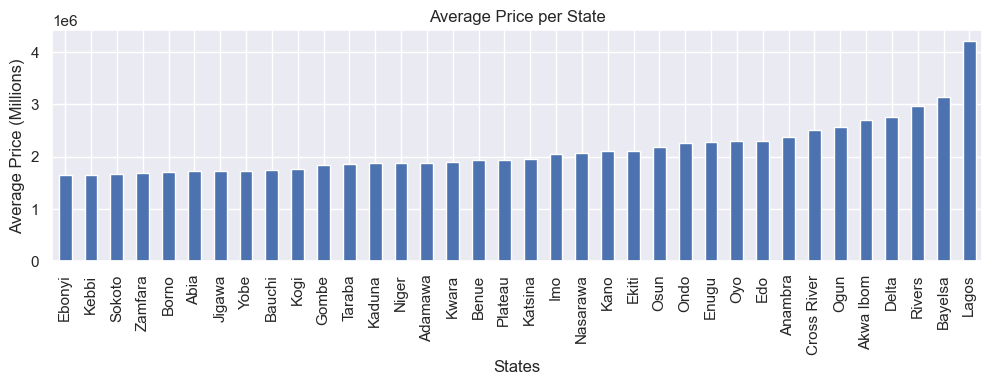

In [17]:
housing_train.groupby('loc')['price'].mean().sort_values().plot(
    kind="bar", title='Average Price per State',
                    ylabel='Average Price (Millions)', xlabel='States');

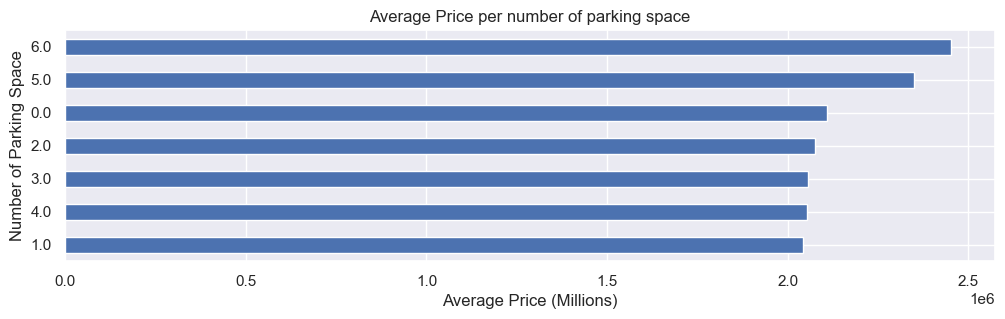

In [18]:
housing_train.groupby('parking_space')['price'].mean().sort_values().plot(
    kind="barh", title='Average Price per number of parking space',
                    xlabel='Average Price (Millions)', ylabel='Number of Parking Space');

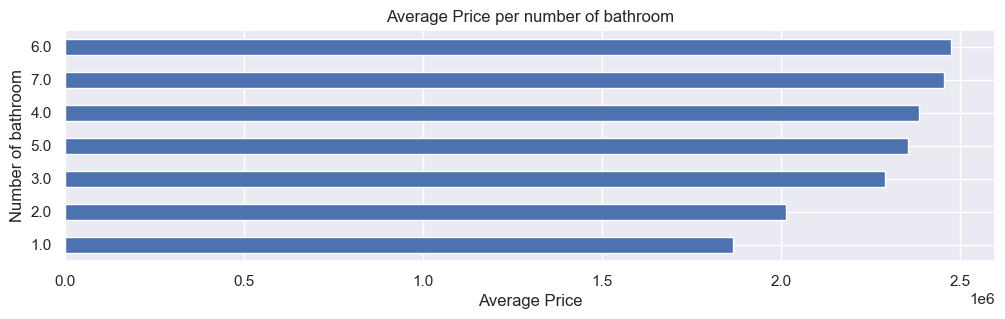

In [19]:
housing_train.groupby('bathroom')['price'].mean().sort_values().plot(
    kind="barh", title='Average Price per number of bathroom',
                    xlabel='Average Price', ylabel='Number of bathroom');

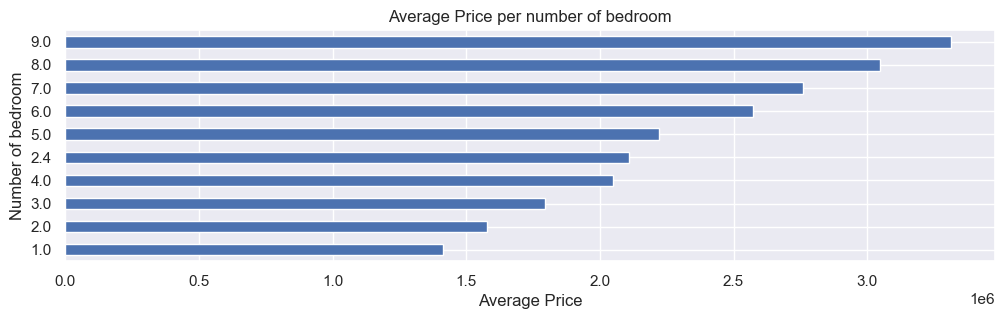

In [20]:
housing_train.groupby('bedroom')['price'].mean().sort_values().plot(
    kind="barh", title='Average Price per number of bedroom',
                    xlabel='Average Price', ylabel='Number of bedroom');

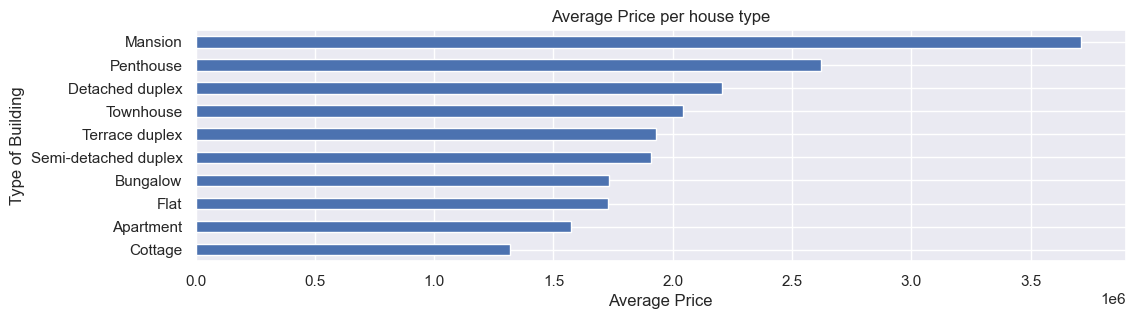

In [21]:
housing_train.groupby('title')['price'].mean().sort_values().plot(
    kind="barh", title='Average Price per house type',
                    xlabel='Average Price', ylabel='Type of Building');

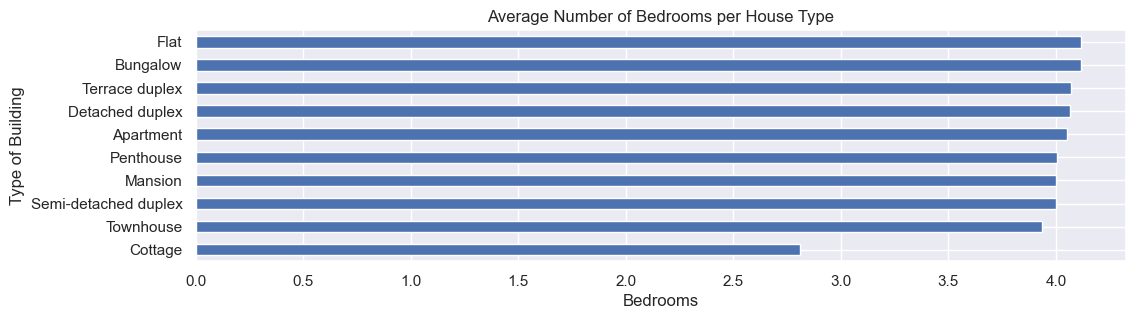

In [22]:
housing_train.groupby('title')['bedroom'].mean().sort_values().plot(
    kind="barh", title='Average Number of Bedrooms per House Type',
                    xlabel='Bedrooms', ylabel='Type of Building');

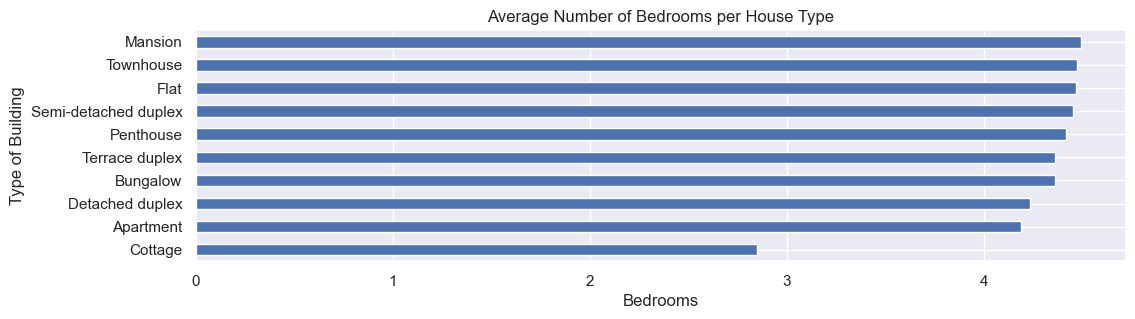

In [23]:
housing_test.groupby('title')['bedroom'].mean().sort_values().plot(
    kind="barh", title='Average Number of Bedrooms per House Type',
                    xlabel='Bedrooms', ylabel='Type of Building');

#### Multivariate Analysis

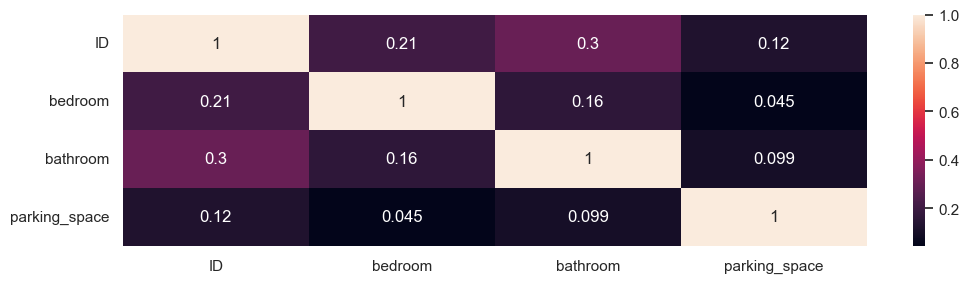

In [24]:
# Create correlation matrix
correlation = housing_train.select_dtypes("number").drop(columns="price").corr()
# Plot heatmap of `correlation`
sns.heatmap(correlation, annot=True);

#### Feature Engineering

In [25]:
from sklearn.preprocessing import LabelEncoder

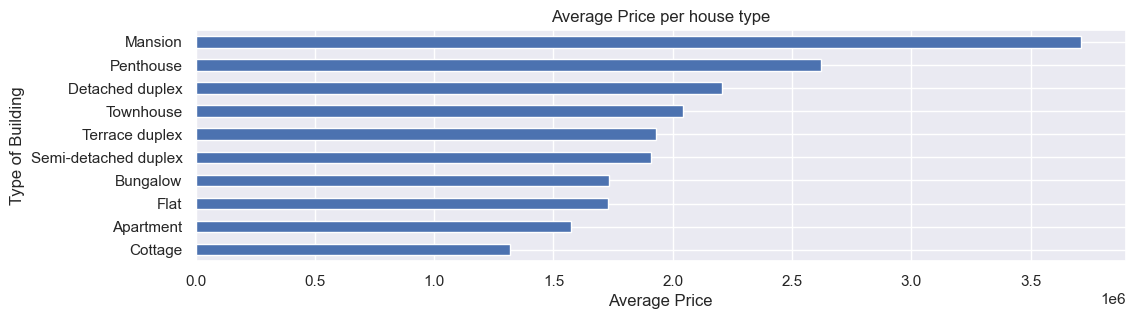

In [26]:
housing_train.groupby('title')['price'].mean().sort_values().plot(
    kind="barh", title='Average Price per house type',
                    xlabel='Average Price', ylabel='Type of Building');

In [27]:
# Define the ranking based on average price (arranged from smallest to biggest)
house_type_ranks = {'Cottage': 1, 'Apartment': 2, 'Flat': 3, 'Bungalow': 4,
    'Semi-detached duplex': 5, 'Terrace duplex': 6, 'Townhouse': 7,
    'Detached duplex': 8, 'Penthouse': 9, 'Mansion': 10
}

# Map the house types to numerical values based on size ranking
housing_train['title'] = housing_train['title'].map(house_type_ranks)
housing_test['title'] = housing_test['title'].map(house_type_ranks)


housing_train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,5,2.0,2.0,1.0,1149999.565
1,2748,Ondo,2,2.4,2.0,4.0,1672416.689
3,2224,Anambra,8,5.0,2.0,4.0,2410306.756
4,10300,Kogi,6,2.4,5.0,6.0,2600700.898
5,1733,Borno,10,2.4,1.0,3.0,1341750.867


In [28]:
# Map state to their Geopolitical zones
state_to_zone = {
    'Abia': 'South East', 'Adamawa': 'North East', 'Akwa Ibom': 'South South', 'Anambra': 'South East', 'Bauchi': 'North East',
    'Bayelsa': 'South South', 'Benue': 'North Central', 'Borno': 'North East', 'Cross River': 'South South', 'Delta': 'South South','Ebonyi': 'South East',
    'Edo': 'South South', 'Ekiti': 'South West', 'Enugu': 'South East', 'Gombe': 'North East', 'Imo': 'South East',
    'Jigawa': 'North West', 'Kaduna': 'North West', 'Kano': 'North West', 'Katsina': 'North West', 'Kebbi': 'North West',
    'Kogi': 'North Central', 'Kwara': 'North Central', 'Lagos': 'South West', 'Nassarawa': 'North Central', 'Niger': 'North Central',
    'Ogun': 'South West', 'Ondo': 'South West','Osun': 'South West', 'Oyo': 'South West', 'Plateau': 'North Central',
    'Rivers': 'South South', 'Sokoto': 'North West','Taraba': 'North East', 'Yobe': 'North East','Zamfara': 'North West'
}

# Map the states to their geopolitical zones based on size ranking
housing_train['geopolitical_zone'] = housing_train['loc'].map(state_to_zone)
housing_test['geopolitical_zone'] = housing_test['loc'].map(state_to_zone)

housing_train['geopolitical_zone'].value_counts()

North West       2080
North East       1763
South West       1745
South South      1694
South East       1483
North Central    1471
Name: geopolitical_zone, dtype: int64

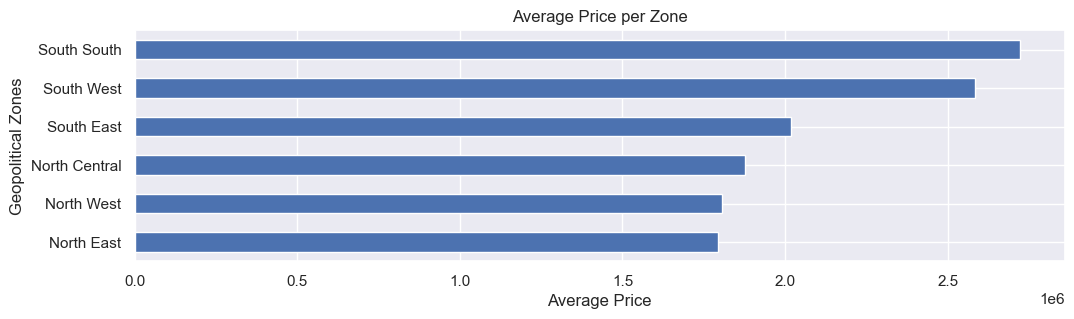

In [29]:
housing_train.groupby('geopolitical_zone')['price'].mean().sort_values().plot(
    kind="barh", title='Average Price per Zone',
                    xlabel='Average Price', ylabel='Geopolitical Zones');

In [30]:
# perform one-hot encoding for the 'loc' and 'geopolitical' column
loc_encoded_train = pd.get_dummies(housing_train['loc'], prefix='loc')
zone_encoded_train = pd.get_dummies(housing_train['geopolitical_zone'], prefix='zone')

loc_encoded_test = pd.get_dummies(housing_test['loc'], prefix='loc')
zone_encoded_test = pd.get_dummies(housing_test['geopolitical_zone'], prefix='zone')

# concatenate the one-hot encoded columns with the original DataFrame
housing_train = pd.concat([housing_train, loc_encoded_train], axis=1)
housing_train = pd.concat([housing_train, zone_encoded_train], axis=1)

housing_test = pd.concat([housing_test, loc_encoded_test], axis=1)
housing_test = pd.concat([housing_test, zone_encoded_test], axis=1)

# Drop the original 'title' and 'loc' columns
housing_train.drop(columns=['loc', 'geopolitical_zone', 'ID'], inplace=True)
housing_test.drop(columns=['loc', 'geopolitical_zone', 'ID'], inplace=True)

print(housing_train.shape, housing_test.shape)

(10531, 47) (6000, 46)


In [31]:
# Create new column - bedroom:bathroom ratio
housing_train['bed_bath_ratio'] = housing_train['bedroom']/housing_train['bathroom']
housing_test['bed_bath_ratio'] = housing_test['bedroom']/housing_test['bathroom']

In [32]:
housing_train.head()

,title,bedroom,bathroom,parking_space,price,loc_Abia,loc_Adamawa,loc_Akwa Ibom,loc_Anambra,loc_Bauchi,loc_Bayelsa,loc_Benue,loc_Borno,loc_Cross River,loc_Delta,loc_Ebonyi,loc_Edo,loc_Ekiti,loc_Enugu,loc_Gombe,loc_Imo,loc_Jigawa,loc_Kaduna,loc_Kano,loc_Katsina,loc_Kebbi,loc_Kogi,loc_Kwara,loc_Lagos,loc_Nasarawa,loc_Niger,loc_Ogun,loc_Ondo,loc_Osun,loc_Oyo,loc_Plateau,loc_Rivers,loc_Sokoto,loc_Taraba,loc_Yobe,loc_Zamfara,zone_North Central,zone_North East,zone_North West,zone_South East,zone_South South,zone_South West,bed_bath_ratio
0,5,2.0,2.0,1.0,1149999.565,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.00
1,2,2.4,2.0,4.0,1672416.689,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.20
3,8,5.0,2.0,4.0,2410306.756,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.50
4,6,2.4,5.0,6.0,2600700.898,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.48
5,10,2.4,1.0,3.0,1341750.867,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2.40


In [33]:
housing_test.head()

,title,bedroom,bathroom,parking_space,loc_Abia,loc_Adamawa,loc_Akwa Ibom,loc_Anambra,loc_Bauchi,loc_Bayelsa,loc_Benue,loc_Borno,loc_Cross River,loc_Delta,loc_Ebonyi,loc_Edo,loc_Ekiti,loc_Enugu,loc_Gombe,loc_Imo,loc_Jigawa,loc_Kaduna,loc_Kano,loc_Katsina,loc_Kebbi,loc_Kogi,loc_Kwara,loc_Lagos,loc_Nasarawa,loc_Niger,loc_Ogun,loc_Ondo,loc_Osun,loc_Oyo,loc_Plateau,loc_Rivers,loc_Sokoto,loc_Taraba,loc_Yobe,loc_Zamfara,zone_North Central,zone_North East,zone_North West,zone_South East,zone_South South,zone_South West,bed_bath_ratio
0,9,4,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.000000
1,2,2,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.000000
2,4,2,7,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.285714
3,10,9,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.800000
4,5,5,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.833333


In [34]:
print(housing_train.shape, housing_test.shape)

(10531, 48) (6000, 47)


#### Training

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold

In [36]:
# Splitting features and Target
X = housing_train.drop(columns=['price']) 
y = housing_train['price']

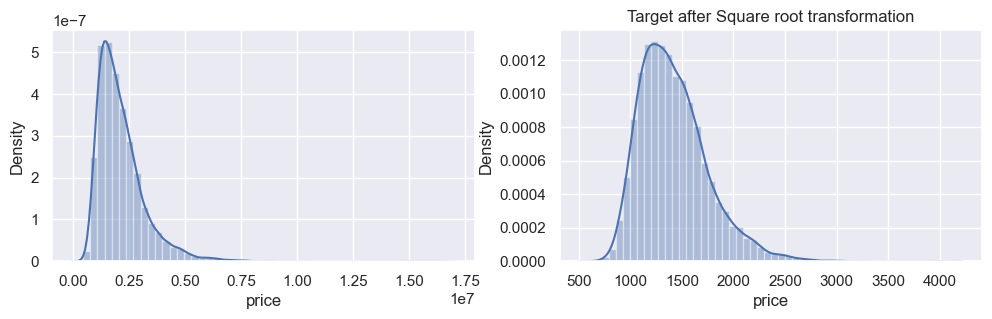

In [37]:
# Apply Sqrt transformation to the target variable
y_transformed = pd.Series(np.sqrt(y))
fig, ax = plt.subplots(1, 2)
sns.distplot(y, ax=ax[0])
plt.title("Target after Square root transformation")
sns.distplot(y_transformed, ax=ax[1]);

In [38]:
# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y_transformed, test_size = 0.2, random_state = 0)

### Baseline Model (Light GBM)

In [39]:
# Train the model on the transformed target variable
light = LGBMRegressor(random_state=42)
light.fit(X_train, y_train)
# Make predictions on the validation set
light_pred = light.predict(X_val)

In [40]:
# Inverse transform the validation and predictions to get back the original scale
y_val = y_val**2
y_pred = light_pred**2

In [41]:
comparison = pd.DataFrame({'Actual Values':y_val, 'Predictions':y_pred})
comparison.head(10)

,Actual Values,Predictions
1388,1155158.434,1.206227e+06
3840,1334784.880,1.449174e+06
337,1625234.094,1.620698e+06
3501,1059577.337,1.071573e+06
6024,1459428.053,1.444453e+06
2466,2996027.059,2.982226e+06
13100,1050162.077,1.099856e+06
9655,1675506.242,1.717057e+06
8633,1002852.320,1.026011e+06
3147,3574961.893,3.290779e+06


In [42]:
print(f'mse = {mean_squared_error(y_val, y_pred, squared=False)}')

mse = 388125.994979833


#### Prediction on test dataset

In [43]:
submission = pd.read_csv('Sample_submission.csv')

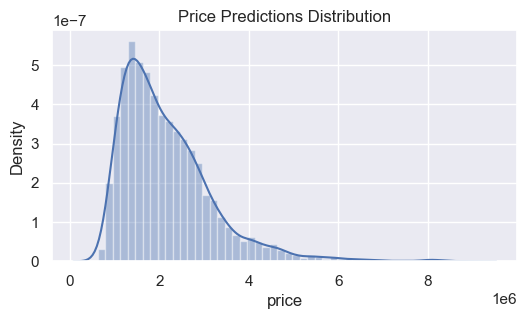

In [44]:
# Make prediction on the test set
predictions = light.predict(housing_test)
# Inverse transform the predictions to get back the original scale
predictions = predictions**2

# Create a submission file
sub_file = submission.copy()
sub_file['price'] = predictions

# Check the distribution of  predictions
plt.figure(figsize=(6, 3))
sns.distplot(sub_file.price)
plt.title('Price Predictions Distribution');

In [45]:
# Write to csv file to submit to Zindi
sub_file.to_csv("Baseline2.csv", index = False)

### Hyper parameter Tunning (LightGBM)

In [46]:
fold_pred=[]
oof_pred = []

params = {'num_leaves': 10, 
          'n_estimators': 200, 
          'max_depth': 7, 
          'learning_rate': 0.1, 
          'colsample_bytree': 0.5, 
          'subsample': 0.5}

fold = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X,y):     
  
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = np.sqrt(y.iloc[train_index]), y.iloc[test_index]

    model = LGBMRegressor(**params, objective = "rmse", random_state=101)
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100, verbose = False)

    pred= model.predict(X_test)
    print("rmse: ",(mean_squared_error(y_test,(pred)**2, squared=False)))
    oof_pred.append(mean_squared_error(y_test,(pred)**2,squared=False))
    p2 = model.predict(housing_test[X.columns])
    fold_pred.append(p2**2)
    

print(np.mean(oof_pred))

rmse:  376757.5209067305
rmse:  362068.0493442585
rmse:  552812.910844616
rmse:  410628.5994119003
rmse:  384995.3747304813
rmse:  368380.3394316024
rmse:  473727.15372178715
rmse:  431091.87290206645
rmse:  418708.9128389919
rmse:  380404.7705276942
415957.55046601285


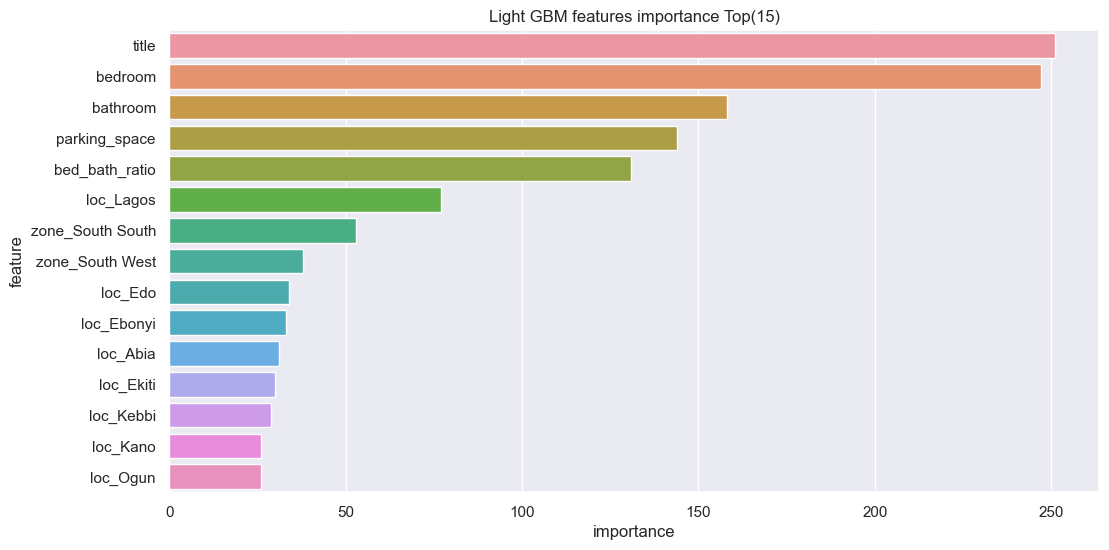

In [47]:
feature_importance_df = pd.DataFrame(model.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns

plt.figure(figsize=(12, 6));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(15))
plt.title('Light GBM features importance Top(15)');

In [48]:
sub_file['price'] =  np.mean(fold_pred, axis = 0)

In [49]:
sub_file.to_csv('lightGB_submission.csv', index=False)

### CatBoost Regressor

In [50]:
fold_pred_2=[]
oof_pred_2 = []

fold_2 = KFold(n_splits=10, shuffle=True)

for train_index, test_index in fold.split(X,y):     
  
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test =  np.sqrt(y.iloc[train_index]), y.iloc[test_index]

    model_2 = CatBoostRegressor(subsample=0.9, iterations=700, learning_rate=0.1, l2_leaf_reg= 5, depth = 3, colsample_bylevel = 0.7, random_state = 42) 
    model_2.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100, verbose = False)

    preds= model_2.predict(X_test)
    print("rmse: ",(mean_squared_error(y_test,(preds)**2, squared=False))) 
    oof_pred_2.append(mean_squared_error(y_test,(preds)**2,squared=False))
    p3 = model_2.predict(housing_test[X.columns])
    fold_pred_2.append((p3)**2)
    

print(np.mean(oof_pred_2))

rmse:  372974.8679375806
rmse:  356668.8362630168
rmse:  554600.3085237489
rmse:  416431.105150657
rmse:  382636.7935200621
rmse:  361951.7765146612
rmse:  471324.8721283593
rmse:  430091.42733493034
rmse:  422792.35673554515
rmse:  385574.4725953782
415504.6816703939


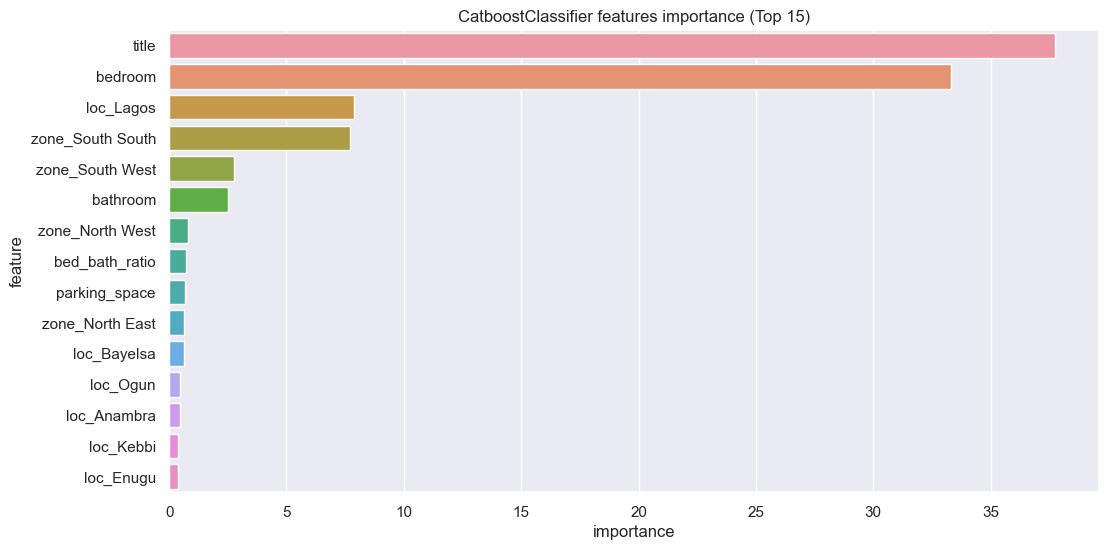

In [51]:
feature_importance_df = pd.DataFrame(model_2.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns

plt.figure(figsize=(12, 6));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(15))
plt.title('CatboostClassifier features importance (Top 15)');

In [52]:
sub_file['price'] =  np.mean(fold_pred_2, axis = 0)

In [53]:
sub_file.to_csv('CatBoost_submission.csv', index=False)

#### Blending Models

In [54]:
cat_pred = pd.read_csv('CatBoost_submission.csv')['price']
lgb_pred = pd.read_csv('lightGB_submission.csv')['price']

In [55]:
sub_pred = (cat_pred * 0.7) + (lgb_pred * 0.3)
sub_file['price'] = sub_pred
sub_file.to_csv('Blended_2.csv', index=False)